# Stock Market Prediction and Forecasting using Stacked LSTM


### Keras and Tensorflow

In [1]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader as pdr

In [3]:
tiingo_api_key = 'c92713db0b5ca17d70a41b4c4c562369dfce5bb4'
df = pdr.get_data_tiingo('AAPL', api_key=tiingo_api_key)

C:\Users\am421\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-28,15.636786,16.186071,15.566429,16.065357,13.757315,785517600
1,2013-01-29,16.375000,16.435715,16.147142,16.366785,14.015439,571158000
2,2013-01-30,16.321428,16.521429,16.232143,16.315357,13.971395,417155200
3,2013-01-31,16.320715,16.402857,16.249287,16.267500,13.930416,319334400
4,2013-02-01,16.396786,16.410000,16.012501,16.200714,13.873220,539484400


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2659,2023-08-21,175.070007,176.130005,173.740005,175.839996,175.839996,46311900
2660,2023-08-22,177.059998,177.679993,176.250000,177.229996,177.229996,42084200
2661,2023-08-23,178.520004,181.550003,178.330002,181.119995,181.119995,52722800
2662,2023-08-24,180.669998,181.100006,176.009995,176.380005,176.380005,54945800
2663,2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51418700


In [8]:
df1 = df.reset_index()['Close']

In [9]:
df1

0        16.065357
1        16.366785
2        16.315357
3        16.267500
4        16.200714
           ...    
2659    175.839996
2660    177.229996
2661    181.119995
2662    176.380005
2663    178.610001
Name: Close, Length: 2664, dtype: float64

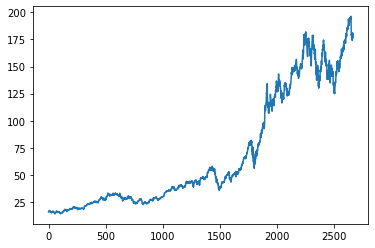

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data , so we apply MinMax scaler

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
print(df1)

[[0.01160454]
 [0.01325617]
 [0.01297438]
 ...
 [0.91600114]
 [0.89002895]
 [0.90224793]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size, test_size

(1731, 933)

In [17]:
print(train_data)

[[0.01160454]
 [0.01325617]
 [0.01297438]
 ...
 [0.29440692]
 [0.28921524]
 [0.29135219]]


In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
    # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1630, 100)
(1630,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(832, 100)
(832,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\am421\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Check the permissions.



In [24]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.25.2-cp39-cp39-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.25.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.25.2 which is incompatible.


In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 10s 219ms/step - loss: 0.0024 - val_loss: 0.0075
Epoch 2/100
26/26 [==============================] - 5s 194ms/step - loss: 1.6770e-04 - val_loss: 0.0057
Epoch 3/100
26/26 [==============================] - 5s 189ms/step - loss: 1.0999e-04 - val_loss: 0.0036
Epoch 4/100
26/26 [==============================] - 5s 176ms/step - loss: 9.5945e-05 - val_loss: 0.0032
Epoch 5/100
26/26 [==============================] - 5s 187ms/step - loss: 9.0139e-05 - val_loss: 0.0025
Epoch 6/100
26/26 [==============================] - 5s 188ms/step - loss: 8.6518e-05 - val_loss: 0.0018
Epoch 7/100
26/26 [==============================] - 5s 202ms/step - loss: 8.2666e-05 - val_loss: 0.0015
Epoch 8/100
26/26 [==============================] - 5s 175ms/step - loss: 9.0727e-05 - val_loss: 0.0017
Epoch 9/100
26/26 [==============================] - 5s 194ms/step - loss: 7.5296e-05 - val_loss: 0.0015
Epoch 10/100
26/26 [==============================] - 4s 1

26/26 [==============================] - 4s 150ms/step - loss: 3.5766e-05 - val_loss: 8.6411e-04
Epoch 78/100
26/26 [==============================] - 4s 151ms/step - loss: 2.5898e-05 - val_loss: 0.0016
Epoch 79/100
26/26 [==============================] - 4s 150ms/step - loss: 2.5020e-05 - val_loss: 7.0309e-04
Epoch 80/100
26/26 [==============================] - 4s 150ms/step - loss: 2.7514e-05 - val_loss: 6.8532e-04
Epoch 81/100
26/26 [==============================] - 4s 151ms/step - loss: 2.4176e-05 - val_loss: 7.7237e-04
Epoch 82/100
26/26 [==============================] - 4s 156ms/step - loss: 2.3338e-05 - val_loss: 7.9876e-04
Epoch 83/100
26/26 [==============================] - 4s 152ms/step - loss: 2.4794e-05 - val_loss: 9.0556e-04
Epoch 84/100
26/26 [==============================] - 4s 151ms/step - loss: 2.3341e-05 - val_loss: 6.4930e-04
Epoch 85/100
26/26 [==============================] - 4s 150ms/step - loss: 2.3400e-05 - val_loss: 6.5721e-04
Epoch 86/100
26/26 [=======

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.13.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

26/26 [==============================] - 1s 38ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

36.59532593558466

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

150.27742439101962

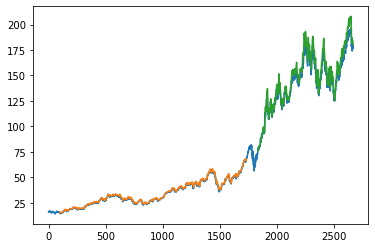

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

933

In [63]:
x_input=test_data[833:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
temp_input

[0.8311256420782013,
 0.8208791521356554,
 0.8258106408264649,
 0.8113998516962757,
 0.8046602397993492,
 0.800824692278046,
 0.8307420473266183,
 0.8288243146612947,
 0.828933841929845,
 0.8357282969120143,
 0.8420843962480141,
 0.8367145464316579,
 0.8277832165770312,
 0.8294818125145982,
 0.8209339952208983,
 0.8208791521356554,
 0.846358304894864,
 0.8533170535195471,
 0.852823926020037,
 0.8470705636427539,
 0.8410980645377142,
 0.8320022766592613,
 0.8746319070911123,
 0.8742483123395293,
 0.8647690119001495,
 0.8745770640058695,
 0.8756181566107558,
 0.869152530006206,
 0.8664128414637527,
 0.8664128414637527,
 0.8698100278595092,
 0.8827413632592654,
 0.8833441002179822,
 0.8780838598608325,
 0.8636183098360567,
 0.8651525244610764,
 0.8714538574231124,
 0.884823471757759,
 0.8950699617003048,
 0.8947959764079283,
 0.9103573854115542,
 0.9150696551839507,
 0.9075629359745144,
 0.9055355938499844,
 0.8979192597019645,
 0.9129875466854571,
 0.9151245037485706,
 0.9306310641875766

In [66]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9448033]
101
1 day input [0.82087915 0.82581064 0.81139985 0.80466024 0.80082469 0.83074205
 0.82882431 0.82893384 0.8357283  0.8420844  0.83671455 0.82778322
 0.82948181 0.820934   0.82087915 0.8463583  0.85331705 0.85282393
 0.84707056 0.84109806 0.83200228 0.87463191 0.87424831 0.86476901
 0.87457706 0.87561816 0.86915253 0.86641284 0.86641284 0.86981003
 0.88274136 0.8833441  0.87808386 0.86361831 0.86515252 0.87145386
 0.88482347 0.89506996 0.89479598 0.91035739 0.91506966 0.90756294
 0.90553559 0.89791926 0.91298755 0.9151245  0.93063106 0.92800099
 0.93150779 0.94279529 0.93682279 0.93731592 0.93156264 0.9482199
 0.94646646 0.9387406  0.95402803 0.9605485  0.96241147 0.98641117
 0.97813734 0.97194562 0.9745757  0.96838397 0.95704171 0.95413764
 0.9633978  0.96761686 0.96843882 0.98652078 0.98509609 0.99260289
 0.98180851 0.97528804 0.97972632 0.98449335 0.98931523 0.98230163
 0.99660281 1.         0.99539735 0.97879484 0.97106889 0.92076825
 0.90356301 0.9087684  0.8999466  0

10 day output [[1.5064355]]
11 day input [0.83671455 0.82778322 0.82948181 0.820934   0.82087915 0.8463583
 0.85331705 0.85282393 0.84707056 0.84109806 0.83200228 0.87463191
 0.87424831 0.86476901 0.87457706 0.87561816 0.86915253 0.86641284
 0.86641284 0.86981003 0.88274136 0.8833441  0.87808386 0.86361831
 0.86515252 0.87145386 0.88482347 0.89506996 0.89479598 0.91035739
 0.91506966 0.90756294 0.90553559 0.89791926 0.91298755 0.9151245
 0.93063106 0.92800099 0.93150779 0.94279529 0.93682279 0.93731592
 0.93156264 0.9482199  0.94646646 0.9387406  0.95402803 0.9605485
 0.96241147 0.98641117 0.97813734 0.97194562 0.9745757  0.96838397
 0.95704171 0.95413764 0.9633978  0.96761686 0.96843882 0.98652078
 0.98509609 0.99260289 0.98180851 0.97528804 0.97972632 0.98449335
 0.98931523 0.98230163 0.99660281 1.         0.99539735 0.97879484
 0.97106889 0.92076825 0.90356301 0.9087684  0.8999466  0.89874113
 0.8977548  0.90690544 0.89589184 0.89107004 0.876988   0.87967292
 0.88707003 0.89468637 0

21 day output [[2.491205]]
22 day input [0.87463191 0.87424831 0.86476901 0.87457706 0.87561816 0.86915253
 0.86641284 0.86641284 0.86981003 0.88274136 0.8833441  0.87808386
 0.86361831 0.86515252 0.87145386 0.88482347 0.89506996 0.89479598
 0.91035739 0.91506966 0.90756294 0.90553559 0.89791926 0.91298755
 0.9151245  0.93063106 0.92800099 0.93150779 0.94279529 0.93682279
 0.93731592 0.93156264 0.9482199  0.94646646 0.9387406  0.95402803
 0.9605485  0.96241147 0.98641117 0.97813734 0.97194562 0.9745757
 0.96838397 0.95704171 0.95413764 0.9633978  0.96761686 0.96843882
 0.98652078 0.98509609 0.99260289 0.98180851 0.97528804 0.97972632
 0.98449335 0.98931523 0.98230163 0.99660281 1.         0.99539735
 0.97879484 0.97106889 0.92076825 0.90356301 0.9087684  0.8999466
 0.89874113 0.8977548  0.90690544 0.89589184 0.89107004 0.876988
 0.87967292 0.88707003 0.89468637 0.91600114 0.89002895 0.90224793
 0.9448033  0.96193564 0.99037069 1.02715635 1.0710659  1.12221622
 1.18124592 1.24884999 1.3

29 day output [[2.6412761]]
[[0.9448032975196838], [0.9619356393814087], [0.9903706908226013], [1.0271563529968262], [1.071065902709961], [1.1222162246704102], [1.1812459230422974], [1.2488499879837036], [1.3255550861358643], [1.4115405082702637], [1.506435513496399], [1.6091099977493286], [1.717545747756958], [1.8288847208023071], [1.9397122859954834], [2.046535015106201], [2.1462955474853516], [2.236741542816162], [2.3165647983551025], [2.3853306770324707], [2.4432976245880127], [2.4912049770355225], [2.5300791263580322], [2.5610783100128174], [2.5853769779205322], [2.6040894985198975], [2.6182219982147217], [2.6286540031433105], [2.636131763458252], [2.6412761211395264]]


In [67]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [68]:
import matplotlib.pyplot as plt

In [69]:
len(df1)

2664

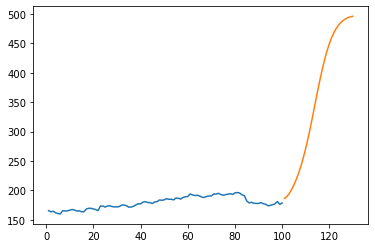

In [72]:
plt.plot(day_new,scaler.inverse_transform(df1[2564:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

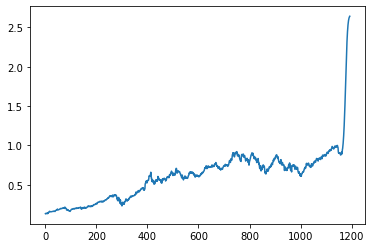

In [83]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [74]:
df3=scaler.inverse_transform(df3).tolist()

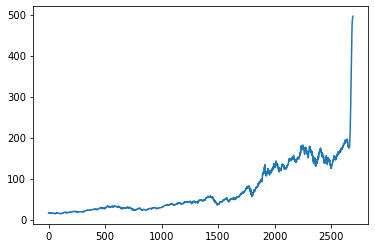

In [75]:
plt.plot(df3)